In [0]:
pip install numpy pandas matplotlib scikit-learn


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
# Install SpaCy
%pip install spacy

# Download the English model
!python -m spacy download en_core_web_sm


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [0]:
dbutils.library.restartPython() 

In [0]:
!pip install nltk

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a DataFrame
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
df['target_names'] = df['target'].apply(lambda x: newsgroups.target_names[x])

# Display the first few rows
print(df.head(2))


                                                text  ...              target_names
0  \n\nI am sure some bashers of Pens fans are pr...  ...          rec.sport.hockey
1  My brother is in the market for a high-perform...  ...  comp.sys.ibm.pc.hardware

[2 rows x 3 columns]


In [0]:
print(df['text'].describe())


count     18846
unique    18287
top            
freq        380
Name: text, dtype: object


count    18846.000000
mean       173.128728
std        475.920973
min          0.000000
25%         38.000000
50%         79.000000
75%        159.000000
max      11480.000000
Name: length, dtype: float64


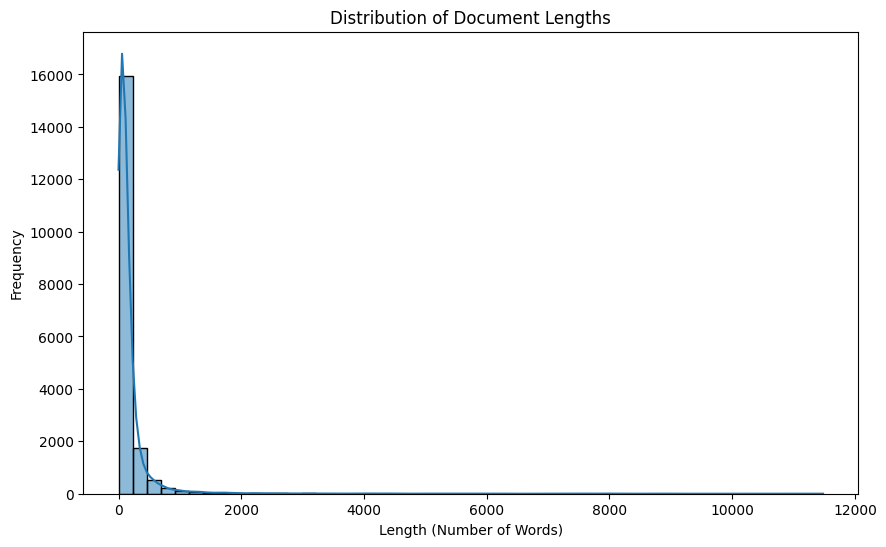

In [0]:
df['length'] = df['clean_text'].apply(lambda x: len(x.split()))

print(df['length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=50, kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


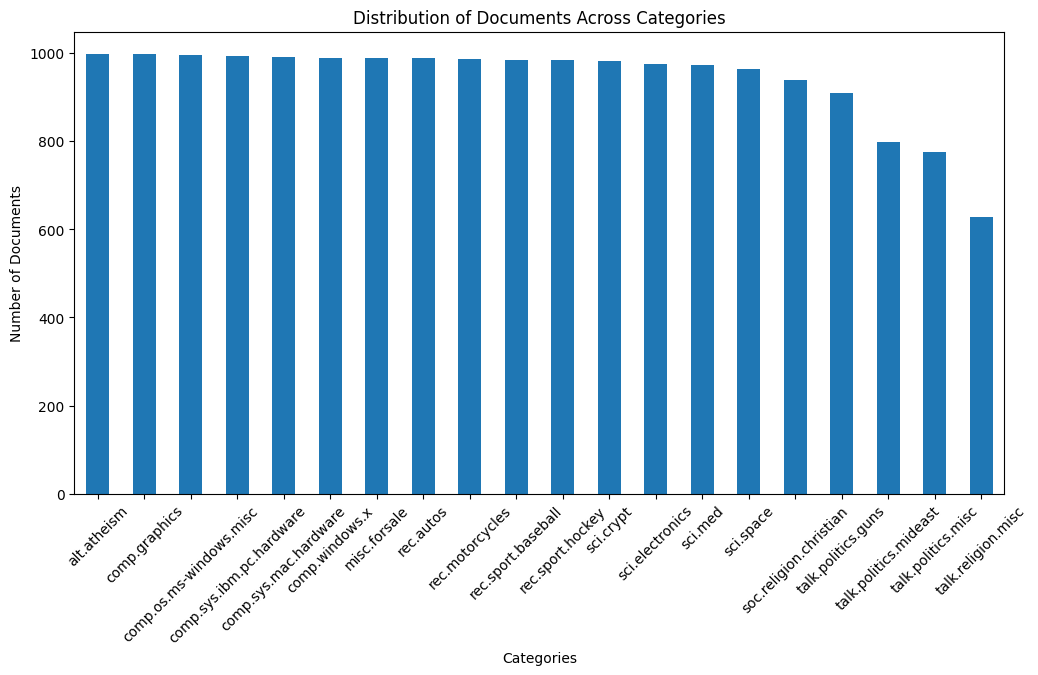

In [0]:
category_counts = df['target'].value_counts()

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Documents Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Documents')
plt.xticks(ticks=range(len(newsgroups.target_names)), labels=newsgroups.target_names, rotation=45)
plt.show()


In [0]:
from collections import Counter
import plotly.express as px

all_tokens = [token for sublist in df['tokens'] for token in sublist]
word_counts = Counter(all_tokens)
top_words = word_counts.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])


fig = px.bar(top_words_df, x='Word', y='Frequency', title='Top 10 Most Frequent Words',
             labels={'Word': 'Words', 'Frequency': 'Frequency'},
             color='Frequency', color_continuous_scale='Viridis')

fig.show()


In [0]:
import re
import html
!pip install nltk
import nltk


def clean_text(text):
    if not isinstance(text, str):
        return ''
   
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    text = re.sub(r'<.*?>', '', text)
 
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\{.*?\}', '', text)
    
    text = re.sub(r'[!"\'#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
  
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF]', '', text)
    
    text = ''.join(char for char in text if ord(char) < 128)
 
    text = re.sub(r'[^a-zA-Z0-9\s@#]', '', text)
    
    text = re.sub(r'[\t\u00A0]', ' ', text)
    
    
    text = re.sub(r'@[^\s]+', '', text)

    text = re.sub(r'#[^\s]+', '', text)
    
    text = html.unescape(text)
    
    text = text.lower()
    
    return text

df['clean_text'] = df['text'].apply(clean_text)
 
print(df[['clean_text', 'text']].head(2))

nlp = spacy.load('en_core_web_sm')

df['tokens'] = df['clean_text'].apply(lambda x: [token.text for token in nlp(x)])

print(df[['clean_text', 'tokens']].head(2))

from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

print(df['tokens_no_stopwords'].head(2))



Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
                                          clean_text                                               text
0  \n\ni am sure some bashers of pens fans are pr...  \n\nI am sure some bashers of Pens fans are pr...
1  my brother is in the market for a highperforma...  My brother is in the market for a high-perform...
                                          clean_text                                             tokens
0  \n\ni am sure some bashers of pens fans are pr...  [\n\n, i, am, sure, some, bashers, of, pens, f...
1  my brother is in the market for a highperforma...  [my, brother, is, in, the, market, for, a, hig...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [\n\n, sure, bashers, pens, fans, pretty, conf...
1    [brother, market, highperformance, video, card...
Name: tokens_no_stopwords, dtype: object


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


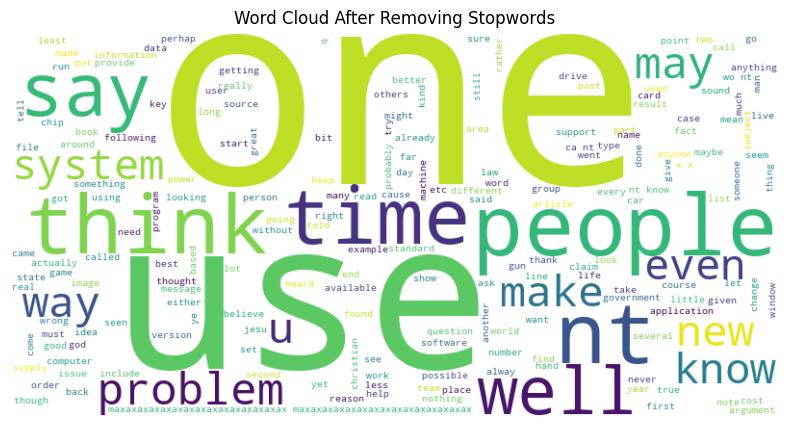

In [0]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_tokens_no_stopwords = [word for tokens in df['tokens_no_stopwords'] for word in tokens]

word_freq = Counter(all_tokens_no_stopwords)

top_words = word_freq.most_common(10)

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

fig = px.bar(top_words_df, 
             x='Word', 
             y='Frequency', 
             title="Top 10 Words After Removing Stopwords", 
             labels={'Word': 'Words', 'Frequency': 'Frequency'}, 
             color='Frequency', 
             color_continuous_scale='Blues')


fig.show()

text_for_wordcloud = ' '.join(all_tokens_no_stopwords)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Word Cloud After Removing Stopwords")
plt.show()


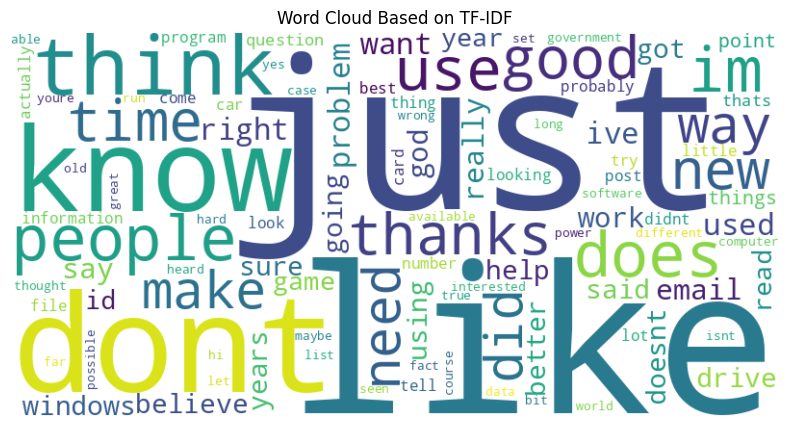

In [0]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['clean_text'].tolist()

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X_tfidf = vectorizer.fit_transform(corpus)

terms = vectorizer.get_feature_names_out()

tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()

tfidf_dict = dict(zip(terms, tfidf_scores))

sorted_tfidf = dict(sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True))

top_tfidf_words = {word: score for word, score in list(sorted_tfidf.items())[:100]}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_tfidf_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis for the word cloud
plt.title("Word Cloud Based on TF-IDF")
plt.show()


Accuracy: 0.7156498673740053

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.57      0.57      0.57       151
           comp.graphics       0.68      0.69      0.68       202
 comp.os.ms-windows.misc       0.70      0.62      0.66       195
comp.sys.ibm.pc.hardware       0.62      0.65      0.63       183
   comp.sys.mac.hardware       0.82      0.67      0.73       205
          comp.windows.x       0.79      0.78      0.79       215
            misc.forsale       0.76      0.67      0.71       193
               rec.autos       0.76      0.74      0.75       196
         rec.motorcycles       0.43      0.79      0.56       168
      rec.sport.baseball       0.85      0.82      0.84       211
        rec.sport.hockey       0.92      0.86      0.89       198
               sci.crypt       0.91      0.76      0.83       201
         sci.electronics       0.63      0.71      0.67       202
                 sci.

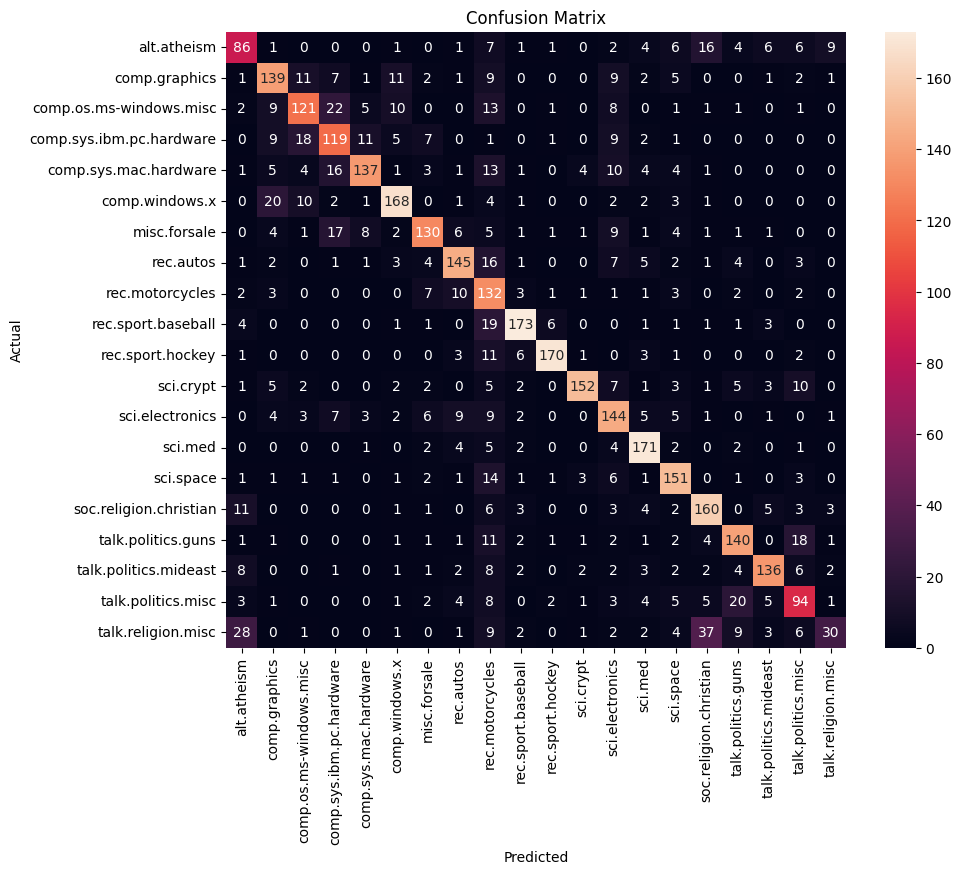

In [0]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

def clean_text(text):
    if not isinstance(text, str):
        return ''
    
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>', '', text) 
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r'\(.*?\)', '', text)  
    text = re.sub(r'\{.*?\}', '', text)  
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  
    text = text.lower()  
    return text

df['clean_text'] = df['text'].apply(clean_text)


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [0]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7156498673740053


In [0]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)
print("Classification Report:\n", report)


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.57      0.57      0.57       151
           comp.graphics       0.68      0.69      0.68       202
 comp.os.ms-windows.misc       0.70      0.62      0.66       195
comp.sys.ibm.pc.hardware       0.62      0.65      0.63       183
   comp.sys.mac.hardware       0.82      0.67      0.73       205
          comp.windows.x       0.79      0.78      0.79       215
            misc.forsale       0.76      0.67      0.71       193
               rec.autos       0.76      0.74      0.75       196
         rec.motorcycles       0.43      0.79      0.56       168
      rec.sport.baseball       0.85      0.82      0.84       211
        rec.sport.hockey       0.92      0.86      0.89       198
               sci.crypt       0.91      0.76      0.83       201
         sci.electronics       0.63      0.71      0.67       202
                 sci.med       0.79      0.88      

In [0]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.73262599 0.73467763 0.73467763 0.7283099  0.72698328]
Mean CV Score: 0.731454888511823
